## League of Legends match predictor

### Task 1: Load the League of Legends dataset and preprocess it for training (10 points)

In [17]:
#%pip install torch
#%pip install pandas
#%pip install sklearn

import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('league_of_legends_data_large.csv')
y = df['win']
X = df.drop('win', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test.to_numpy())

### Task 2: Implement a logistic regression model using PyTorch ( 5 points)

In [33]:
from torch import nn
from torch import optim

class LogisticRegressionModel(nn.Module):

    def __init__(self, n_inputs):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
    
    def forward(self, X):
        yhat = torch.sigmoid(self.linear(X))
        return yhat
    
model = LogisticRegressionModel(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Task 3: Train the logistic regression model on the dataset. (5 Points)

In [37]:
# Implement the train loop for a specified number of epochs.
epochs = 100
for epoch in range(epochs):

    # Make predictions and calculate the loss.
    yhat = model(X_train)
    yhat = yhat.squeeze()
    loss = criterion(yhat, y_train)

    # Perform backpropagation and update the model parameters.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the model and print accuracy on training and testing sets.
accuracy_train = (yhat.round() == y_train).float().mean()
yhat_test = model.forward(X_test)
accuracy_test = (yhat_test.round() == y_test).float().mean()
print('Accuracy of training set:', accuracy_train)
print('Accuracy of testing set:', accuracy_test)

Accuracy of training set: tensor(0.5462)
Accuracy of testing set: tensor(0.5042)


### Task 4: Implement optimization techniques and evaluate the model's performance. (5 points)

In [44]:
# Implement L2 regularization in the optimizer (weight_decay parameter).
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)

# Retrain the model with the same training loop.
epochs = 100
for epoch in range(epochs):

    # Make predictions and calculate the loss.
    yhat = model(X_train)
    yhat = yhat.squeeze()
    loss = criterion(yhat, y_train)

    # Perform backpropagation and update the model parameters.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the optimized model on training and testing sets.
accuracy_train = (yhat.round() == y_train).float().mean()
yhat_test = model.forward(X_test)
yhat_test = yhat_test.squeeze()
accuracy_test = (yhat_test.round() == y_test).float().mean()
print('Accuracy of training set:', accuracy_train)
print('Accuracy of testing set:', accuracy_test)

Accuracy of training set: tensor(0.5437)
Accuracy of testing set: tensor(0.5100)


### Task 5: Visualize the model's performance and interpret the results. (8 Points)

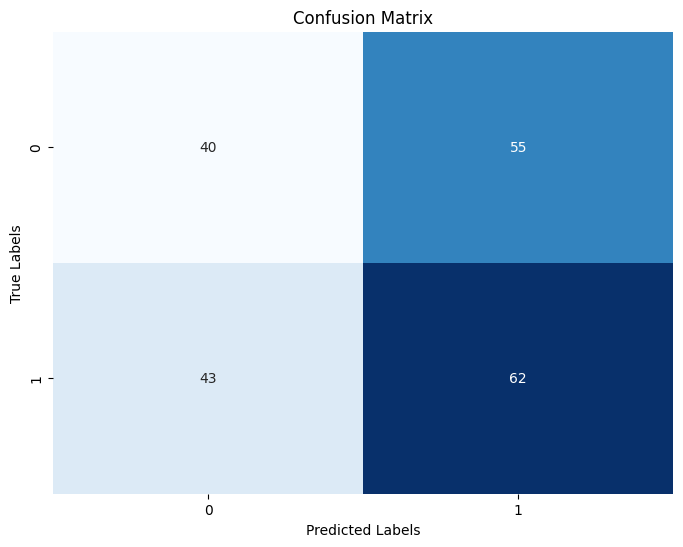

              precision    recall  f1-score   support

           0       0.48      0.42      0.45        95
           1       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.51       200

The AUC value is: 0.5006516290726817


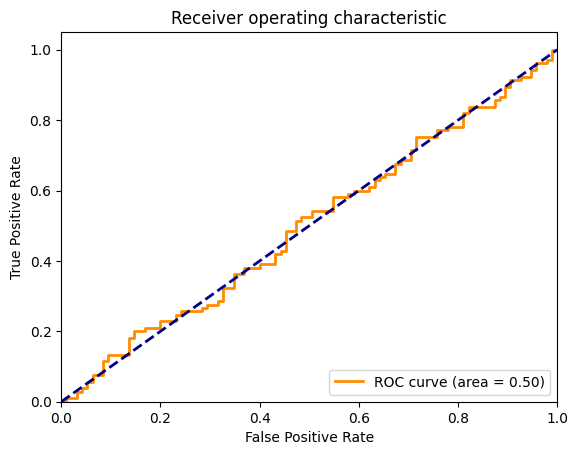

In [82]:
# Import necessary libraries (matplotlib.pyplot, confusion_matrix, classification_report, roc_curve, auc).
#%pip install matplotlib

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Generate and plot the confusion matrix.
yhat_test_binary = yhat_test.round()
cm = confusion_matrix(y_test.detach().numpy(), yhat_test_binary.detach().numpy())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report.
print(classification_report(y_test.detach().numpy(), yhat_test_binary.detach().numpy()))

# Plot the ROC curve and calculate the AUC.
fpr, tpr, thresholds = roc_curve(y_test.detach().numpy(), yhat_test.detach().numpy())
roc_auc = auc(fpr, tpr)
print('The AUC value is:', roc_auc)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Task 6: Save and load the trained model. (8 Points)

In [59]:
# Use torch.save to save the model's state dictionary.
torch.save(model.state_dict(), 'models/model_state_dict.pt')

# Use torch.load to load the state dictionary into a new model instance
model2 = LogisticRegressionModel(X_train.shape[1])
model2.load_state_dict(torch.load('models/model_state_dict.pt'))

# Set the loaded model to evaluation mode.
model2.eval() 

# Evaluate the loaded model and ensure consistent performance.
accuracy_train = (yhat.round() == y_train).float().mean()
yhat_test = model2.forward(X_test)
yhat_test = yhat_test.squeeze()
accuracy_test = (yhat_test.round() == y_test).float().mean()
print('Accuracy of training set:', accuracy_train)
print('Accuracy of testing set:', accuracy_test)

Accuracy of training set: tensor(0.5437)
Accuracy of testing set: tensor(0.5100)


C:\Users\vytask\AppData\Local\Temp\ipykernel_26208\2703267795.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('models/model_state_dict.

### Task 7: Perform hyperparameter tuning to find the best learning rate. (8 Points)

In [81]:
# Define a list of learning rates to test.
learning_rates = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
best_accuracy = 0
best_learning_rate = 0
epochs = 100

# Reinitialize the model and optimizer for each learning rate.
for learning_rate in learning_rates:
    model = LogisticRegressionModel(X_train.shape[1])
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)


    # Train and evaluate the model for each learning rate.
    for epoch in range(epochs):

        # Make predictions and calculate the loss.
        yhat = model(X_train)
        yhat = yhat.squeeze()
        loss = criterion(yhat, y_train)

        # Perform backpropagation and update the model parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Find the best learning rate and corresponding accuracy.
    accuracy = (yhat.round() == y_train).float().mean()
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate

# Print the best learning rate and corresponding test accuracy.
print(f'The best learning rate of {best_learning_rate} for them model has the accuracy of {best_accuracy}')

The best learning rate of 0.1 for them model has the accuracy of 0.5462499856948853


### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction. (6 Points)

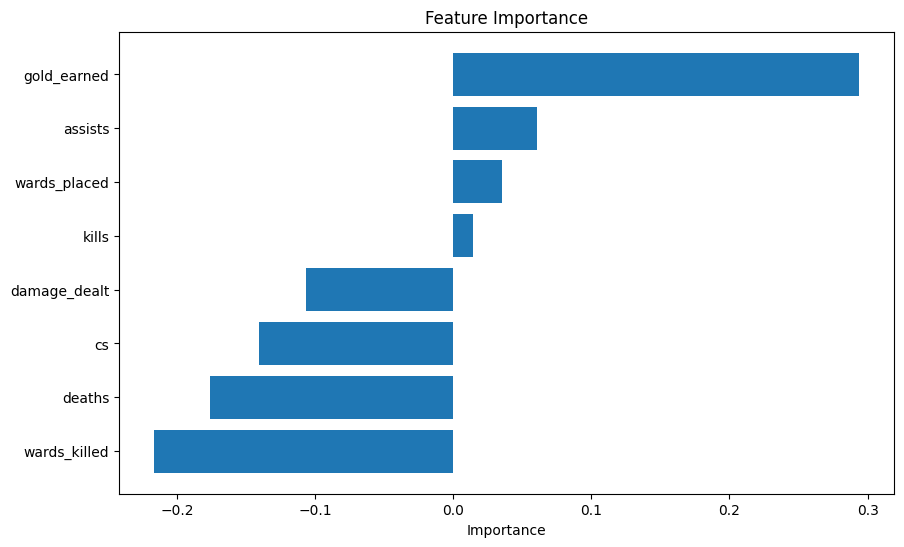

In [ ]:
# Extract the weights from the linear layer.
weights = model.linear.weight.detach().numpy()

# Create a DataFrame with feature names and their corresponding importance.
df = pd.read_csv('league_of_legends_data_large.csv')
df = df.drop('win', axis=1)
column_names = df.columns
feature_importance_df = pd.DataFrame({'feature': column_names, 'importance': weights[0]})

# Sort the DataFrame by importance.
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using a bar plot.
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()